In [ ]:
import sklearn
sklearn . show_versions ()
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



System:
    python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.6.0
          pip: 24.1.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: 3.0.11
       pandas: 2.2.2
   matplotlib: 3.8.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
        version: 0.3.27
threading_layer: pthreads
   architecture: Haswell

       user

In [ ]:
data_url = "/content/drive/MyDrive/diabetes.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(data_url, header=0, names=columns)

In [ ]:
# Step 3: Handle missing values (replace 0 with NaN in certain columns and fill with median)
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zero:
    df[col].replace(0, np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-10-68a89799fb57>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)
<ipython-input-10-68a89799fb57>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
# Step 4: Regression Task - Predict BloodPressure
X_reg = df.drop(['BloodPressure'], axis=1)
y_reg = df['BloodPressure']

In [ ]:
# Step 5: Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Step 7: Make predictions and evaluate regression model
y_pred_reg = lin_reg.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)
reg_r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Task:")
print(f"Mean Squared Error: {reg_mse:.2f}")
print(f"R^2 Score: {reg_r2:.2f}\n")

Regression Task:
Mean Squared Error: 112.13
R^2 Score: 0.23



In [ ]:
# Step 8: Classification Task - Predict Outcome
X_clf = df.drop(['Outcome'], axis=1)
y_clf = df['Outcome']

# Step 9: Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Step 10: Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)

# Step 11: Train KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train_clf)
y_pred_knn = knn.predict(X_test_clf)

# Step 12: Evaluate Logistic Regression model
print("Classification Task (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_log):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test_clf, log_reg.predict_proba(X_test_clf)[:, 1]):.2f}")
print(classification_report(y_test_clf, y_pred_log))

# Step 13: Evaluate KNN model
print("Classification Task (KNN):")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_knn):.2f}")
print(classification_report(y_test_clf, y_pred_knn))


Classification Task (Logistic Regression):
Accuracy: 0.75
ROC-AUC: 0.82
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Classification Task (KNN):
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



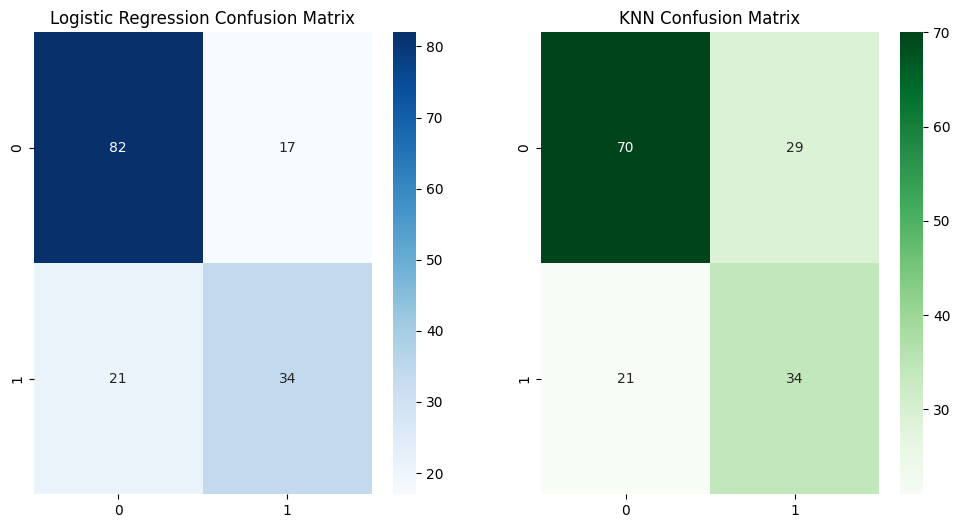

In [ ]:
# Confusion Matrices for Logistic Regression and KNN
conf_matrix_log = confusion_matrix(y_test_clf, y_pred_log)
conf_matrix_knn = confusion_matrix(y_test_clf, y_pred_knn)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
plt.show()